### [API GUS](https://api.stat.gov.pl/)

API GUS to projekt składający się obecnie z 7 odrębnych API:
- API SDP (Składnica Danych Publikacyjnych)
- API DBW (Dziedzinowe Bazy Wiedzy)
- API REGON (Rejestr REGON)
- API TERYT (Rejestr TERYT)
- API BDL (Bank Danych Lokalnych)
- API SDG (Platforma SDG (Sustainable Development Goals))
- API STRATEG (System STRATEG)

Każde z API posiada swoje zestawy reguł dostępu oraz swojego swaggera. Popatrzmy na API STRATEG https://api.stat.gov.pl/Home/StrategApi.

"System STRATEG jest publicznie dostępnym, systemem wspierającym proces monitorowania rozwoju oraz ewaluację efektów podejmowanych działań na rzecz wzmocnienia spójności społecznej. Baza zawiera obszerny zestaw mierników kluczowych dla monitorowania rozwoju (głównie o rocznej częstotliwości) na poziomie kraju, jak również na niższych szczeblach podziału terytorialnego."

In [1]:
import requests

url = "https://strateg.stat.gov.pl/api/indicators"
response = requests.get(url)
data = response.json()

In [4]:
for indicator in data:
    if indicator['indicator_name'] == "Liczba urodzeń żywych":
        indicator_id = indicator['indicator_id']
        print(indicator)

{'indicator_id': 841, 'indicator_name': 'Liczba urodzeń żywych'}


In [5]:
indicator_id

841

In [6]:
# Metryczka
url = f"https://strateg.stat.gov.pl/api/metrics/{indicator_id}"
response = requests.get(url)
metric = response.json()

In [7]:
metric

[{'alternative_name_and_indicator_used_in_the_strategy_or_programme': '-',
  'availability_for_eu': 'Kraje UE, UE-27, UE-28\r\nŹródło danych: Eurostat',
  'available_variables': 'Płeć, Miasto/wieś',
  'data_availability_in_the_system': 'Dane roczne; od 2003 r.',
  'data_source': 'Główny Urząd Statystyczny',
  'indicator_description': 'Urodzenie żywe - (definicja urodzenia noworodka obowiązuje w Polsce od 1994 r. i jest rekomendowana przez Światową Organizację Zdrowia)- Całkowite wydalenie lub wydobycie z ustroju matki noworodka, niezależnie od okresu trwania ciąży, który po takim oddzieleniu oddycha bądź wykazuje jakiekolwiek inne oznaki życia, jak czynność serca, tętnienie pępowiny lub wyraźne skurcze mięśni zależnych od woli (mięśni szkieletowych), bez względu na to, czy sznur pępowiny został przecięty lub łożysko zostało oddzielone; każdy taki noworodek jest uważany za żywo urodzonego.',
  'indicator_name_en': 'Live births',
  'indicator_name_pl': 'Liczba urodzeń żywych',
  'methodo

In [8]:
# indicator's dimension
url = f"https://strateg.stat.gov.pl/api/indicators/{indicator_id}/dimensions"
response =  requests.get(url)
dimension_info = response.json()

In [10]:
dimension_id = dimension_info['dimension_id']
dimension_info

{'data_level': 'Poziom UE Ogółem i  poszczególnych krajów UE',
 'dimension_id': 1142,
 'dimension_name': 'Liczba urodzeń żywych ogółem ',
 'gender_name': 'Ogółem',
 'indicator_id': 841,
 'level_id': '0',
 'name': 'Liczba urodzeń żywych',
 'place_name': 'Ogółem',
 'section_name': 'Ogółem',
 'unit': ''}

In [11]:
print(indicator_id)
print(dimension_id)

841
1142


In [15]:
# Dane rzeczywiste - błąd
url = f'https://strateg.stat.gov.pl/api/indicators/{indicator_id}/dimensions/{dimension_id}'
response = requests.get(url)
error_info = response.json()

In [16]:
error_info

{'message': 'Do wyświetlenia zasobu wymagane jest podanie jednego z parametrów: level_id lub territory_code.'}

In [17]:
# Dane rzeczywiste
url = f'https://strateg.stat.gov.pl/api/indicators/{indicator_id}/dimensions/{dimension_id}'
params = {
    'level_id': 0
}
response = requests.get(url, params=params)
data_info = response.json()

In [18]:
data_info

{'real_values': {'2003': {'030000000000': '5080465',
   '040000000000': '5040797',
   '050000000000': '4384916',
   '100000000000': '351072',
   '120000000000': '76944',
   '140000000000': '114005',
   '160000000000': '67359',
   '180000000000': '39668',
   '200000000000': '8088',
   '220000000000': '93685',
   '240000000000': '64682',
   '260000000000': '13036',
   '280000000000': '56630',
   '300000000000': '793893',
   '320000000000': '104420',
   '340000000000': '440531',
   '360000000000': '200297',
   '380000000000': '61529',
   '400000000000': '29977',
   '420000000000': '5303',
   '440000000000': '21151',
   '460000000000': '4050',
   '480000000000': '706721',
   '500000000000': '112515',
   '520000000000': '212459',
   '540000000000': '51713',
   '560000000000': '17321',
   '580000000000': '99157',
   '600000000000': '94647',
   '620000000000': '695549',
   '640000000000': '544063'},
  '2004': {'030000000000': '5157173',
   '040000000000': '5116866',
   '050000000000': '444117

In [19]:
real_values = data_info['real_values']
real_values

{'2003': {'030000000000': '5080465',
  '040000000000': '5040797',
  '050000000000': '4384916',
  '100000000000': '351072',
  '120000000000': '76944',
  '140000000000': '114005',
  '160000000000': '67359',
  '180000000000': '39668',
  '200000000000': '8088',
  '220000000000': '93685',
  '240000000000': '64682',
  '260000000000': '13036',
  '280000000000': '56630',
  '300000000000': '793893',
  '320000000000': '104420',
  '340000000000': '440531',
  '360000000000': '200297',
  '380000000000': '61529',
  '400000000000': '29977',
  '420000000000': '5303',
  '440000000000': '21151',
  '460000000000': '4050',
  '480000000000': '706721',
  '500000000000': '112515',
  '520000000000': '212459',
  '540000000000': '51713',
  '560000000000': '17321',
  '580000000000': '99157',
  '600000000000': '94647',
  '620000000000': '695549',
  '640000000000': '544063'},
 '2004': {'030000000000': '5157173',
  '040000000000': '5116866',
  '050000000000': '4441177',
  '100000000000': '356131',
  '120000000000':

In [43]:
TERITORY_CODE = '100000000000'

output = {}
for year, year_stats in real_values.items():
    for teritory_code, birth_count in year_stats.items():
        if teritory_code == TERITORY_CODE:
            output[int(year)] = int(birth_count)

In [31]:
output

{2003: 351072,
 2004: 356131,
 2005: 364383,
 2006: 374244,
 2007: 387873,
 2008: 414499,
 2009: 417589,
 2010: 413300,
 2011: 388416,
 2012: 386257,
 2013: 369576,
 2014: 375160,
 2015: 369308,
 2016: 382257,
 2017: 401982,
 2018: 388178,
 2019: 374954,
 2020: 355309,
 2021: 331511,
 2022: 305132,
 2023: 272451}

In [27]:
print(dir(output))

['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


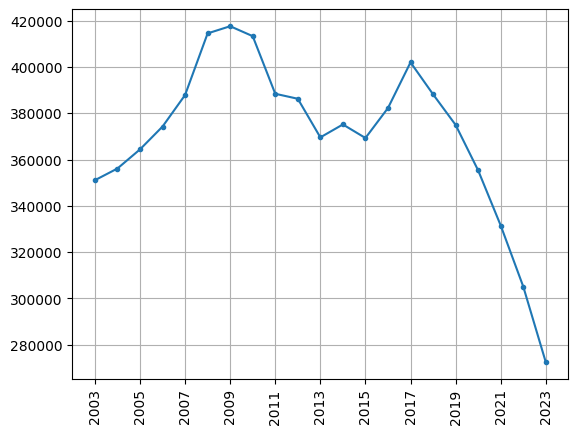

In [41]:
import matplotlib.pyplot as plt

plt.plot(output.keys(), output.values(), marker='.')
plt.xticks(list(output.keys())[::2], rotation=90);
plt.grid()

In [44]:
# Dane dla prtretu jednostki terytorialnej
url = f"https://strateg.stat.gov.pl/api/territorial-data/{TERITORY_CODE}"
response = requests.get(url)
info = response.json()

In [46]:
print(len(info))
info

1669


[{'dimension_id': 5,
  'indicator_id': 14,
  'name': 'Nakłady na działalność B+R w relacji do PKB',
  'territory_code': '100000000000',
  'territory_name': 'POLSKA',
  'unit': '%'},
 {'dimension_id': 7,
  'indicator_id': 18,
  'name': 'Odsetek osób, które czują się bezpiecznie w miejscu zamieszkania ',
  'territory_code': '100000000000',
  'territory_name': 'POLSKA',
  'unit': '%'},
 {'dimension_id': 8,
  'indicator_id': 19,
  'name': 'Odsetek osób deklarujących aktywność w organizacjach społecznych',
  'territory_code': '100000000000',
  'territory_name': 'POLSKA',
  'unit': '%'},
 {'dimension_id': 821,
  'indicator_id': 20,
  'name': 'Odsetek osób korzystających regularnie (co najmniej raz w tygodniu) z Internetu w mieście',
  'territory_code': '100000000000',
  'territory_name': 'POLSKA',
  'unit': '%'},
 {'dimension_id': 822,
  'indicator_id': 20,
  'name': 'Odsetek osób korzystających regularnie (co najmniej raz w tygodniu) z Internetu na wsi',
  'territory_code': '100000000000',
